In [ ]:
Analiza zbioru danych:
zapisanie wybranego zbioru danych do bazy SQLite (w tym "czyszczenie danych"),
analiza wstępna/eksploracyjna (wskaźniki położenia, rozproszenia w tym diagramy, np. punktowy, histogramy),
opracowanie prostego modelu statystycznego (w tym: wykonanie kilku wybranych testów statystycznych, analiza zależności zmiennych, weryfikacja wybranych hipotez statystycznych).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [5]:
projekt= pd.read_excel ("C:/Users/GNNSH.AD-BAYER-CNB/OneDrive - Bayer/Desktop/Data Science/projekt.xlsx")
print(projekt.head())

           ACCOUNT_ID  ID lekarza Segment MarketShare  MkSH number Inicjacja Switch   Age Experience   Gender    City  Kod pocztowy  Visits  Visits with Leaflet  HCP visited  % Clm+Leaflets  Mails sent  open rate  Click to open rate  CLM_SLIDE_DURATION
0  0010Y00001Nj8C7QAJ           1     D16           B            2     niski  niski  65.0          40    Male     Łódź       93-338       3                    3            1             1.0           0        NaN                 NaN              5076.0
1  0010Y00001NjrFSQAZ           2     D16           A            1     niski  niski  47.0          22    Male     Łódź       94-029       3                    3            1             1.0           0        NaN                 NaN              1224.0
2  0010Y00001Njg9jQAB           3     D11           B            2     niski  niski  71.0          46    Male     Łapy       18-100       5                    4            1             0.8           0        NaN                 NaN         

In [6]:
projekt.drop_duplicates(inplace=True)
projekt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ACCOUNT_ID           2930 non-null   object 
 1   ID lekarza           2930 non-null   int64  
 2   Segment              2930 non-null   object 
 3   MarketShare          2930 non-null   object 
 4   MkSH number          2930 non-null   int64  
 5   Inicjacja            2930 non-null   object 
 6   Switch               2930 non-null   object 
 7   Age                  2486 non-null   float64
 8   Experience           2712 non-null   object 
 9   Gender               2930 non-null   object 
 10  City                 2929 non-null   object 
 11  Kod pocztowy         2929 non-null   object 
 12  Visits               2930 non-null   int64  
 13  Visits with Leaflet  2930 non-null   int64  
 14  HCP visited          2930 non-null   int64  
 15  % Clm+Leaflets       2828 non-null   f

In [7]:
projekt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID lekarza,2930.0,1465.500000,845.962470,1.0,733.25,1465.500000,2197.750000,2930.0
MkSH number,2930.0,2.231399,1.006485,1.0,1.00,2.000000,3.000000,4.0
Age,2486.0,55.676991,10.390903,26.0,47.00,57.000000,64.000000,85.0
Visits,2930.0,6.099317,4.884186,0.0,2.00,5.000000,9.000000,31.0
Visits with Leaflet,2930.0,1.294539,1.810860,0.0,0.00,1.000000,2.000000,15.0
HCP visited,2930.0,0.965188,0.183335,0.0,1.00,1.000000,1.000000,1.0
% Clm+Leaflets,2828.0,0.227815,0.300134,0.0,0.00,0.105263,0.338235,1.0
Mails sent,2930.0,0.558362,1.844457,0.0,0.00,0.000000,0.000000,15.0
open rate,696.0,0.444076,0.473147,0.0,0.00,0.076923,1.000000,1.0
Click to open rate,696.0,0.081925,0.255472,0.0,0.00,0.000000,0.000000,1.0


In [9]:
print(projekt.isnull().sum())

ACCOUNT_ID                0
ID lekarza                0
Segment                   0
MarketShare               0
MkSH number               0
Inicjacja                 0
Switch                    0
Age                     444
Experience              218
Gender                    0
City                      1
Kod pocztowy              1
Visits                    0
Visits with Leaflet       0
HCP visited               0
% Clm+Leaflets          102
Mails sent                0
open rate              2234
Click to open rate     2234
CLM_SLIDE_DURATION     1462
dtype: int64


In [10]:
data_cleaned = projekt.dropna()

In [11]:
projekt['Age'] = projekt['Age'].replace('brak', 'nan')


In [12]:
print(projekt[['ACCOUNT_ID', 'Visits', 'ID lekarza']].head())

           ACCOUNT_ID  Visits  ID lekarza
0  0010Y00001Nj8C7QAJ       3           1
1  0010Y00001NjrFSQAZ       3           2
2  0010Y00001Njg9jQAB       5           3
3  0010Y00001Nk4PzQAJ       4           4
4  0010Y00001NjtCEQAZ       3           5


In [13]:
projekt.drop(['ACCOUNT_ID'], axis=1, inplace=True)

print(projekt.columns)

Index(['ID lekarza', 'Segment', 'MarketShare', 'MkSH number', 'Inicjacja', 'Switch', 'Age', 'Experience ', 'Gender', 'City ', 'Kod pocztowy', 'Visits', 'Visits with Leaflet', 'HCP visited', '% Clm+Leaflets', 'Mails sent', 'open rate', 'Click to open rate', 'CLM_SLIDE_DURATION'], dtype='object')


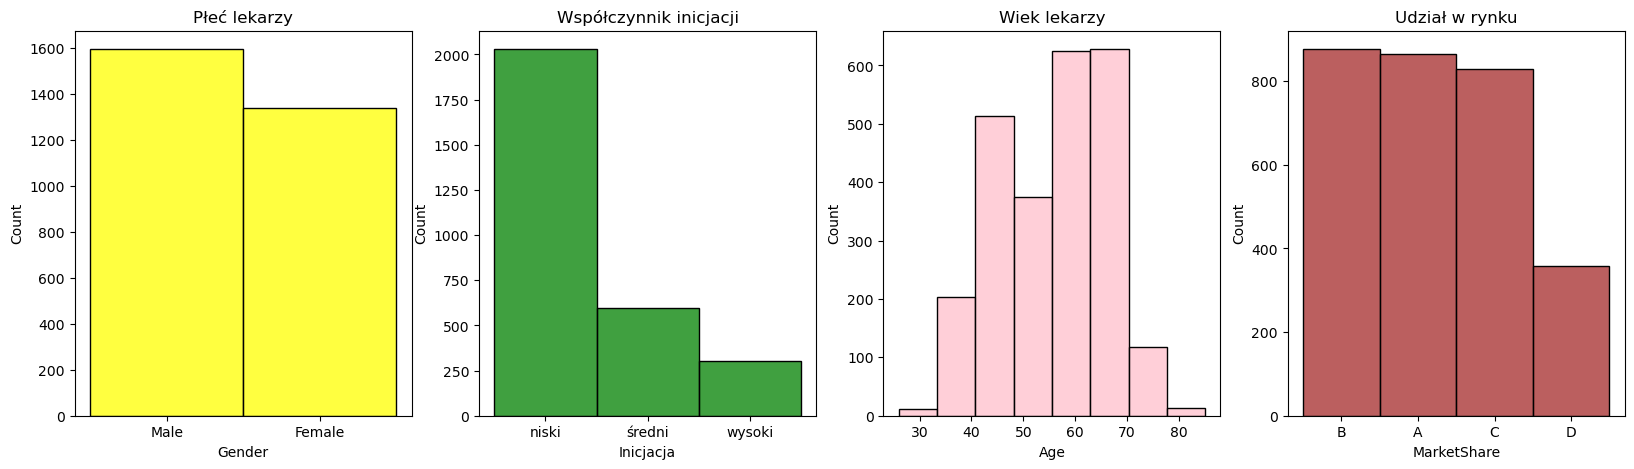

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(20, 5))


plt.subplot(1,4,1)
sns.histplot(projekt['Gender'], bins=10, color = 'yellow')
plt.title('Płeć lekarzy')




plt.subplot(1,4,2)
sns.histplot(projekt['Inicjacja'], bins=4, color = 'green')
plt.title('Współczynnik inicjacji')

plt.subplot(1,4,3)
sns.histplot(projekt['Age'], bins=8, color = 'pink')
plt.title('Wiek lekarzy')

plt.subplot(1,4,4)
sns.histplot(projekt['MarketShare'], bins=4, color='brown')
plt.title('Udział w rynku')
plt.show()





plt.tight_layout()
plt.show




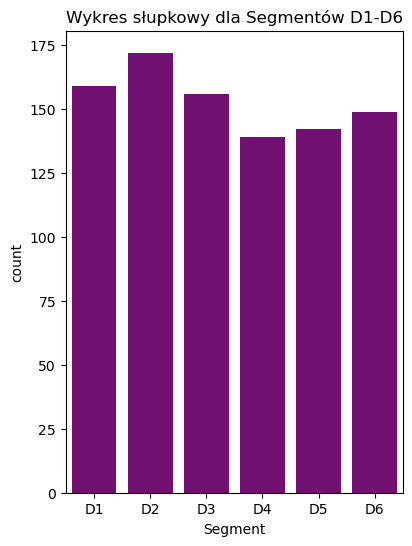

In [39]:
from scipy import stats

projekt = pd.DataFrame(projekt)
plt.figure(figsize=(20, 6))

plt.subplot(1,4,1)

filtered_data = projekt[projekt['Segment'].isin(['D1', 'D2', 'D3', 'D4', 'D5', 'D6'])]
order = ['D1','D2','D3','D4','D5','D6']
sns.countplot(x='Segment', data=filtered_data, color='purple', order=order)
plt.title('Wykres słupkowy dla Segmentów D1-D6')
plt.show() 


In [44]:
print(projekt.dtypes)

projekt['Experience '] = pd.to_numeric(projekt['Experience '], errors='coerce')
segment_mapping = {f'D{i}': i for i in range(1, 21)}  
projekt['Segment_numeric'] = projekt['Segment'].map(segment_mapping)


ID lekarza               int64
Segment                 object
MarketShare             object
MkSH number              int64
Inicjacja               object
Switch                  object
Age                    float64
Experience             float64
Gender                  object
City                    object
Kod pocztowy            object
Visits                   int64
Visits with Leaflet      int64
HCP visited              int64
% Clm+Leaflets         float64
Mails sent               int64
open rate              float64
Click to open rate     float64
CLM_SLIDE_DURATION     float64
Segment_numeric          int64
dtype: object


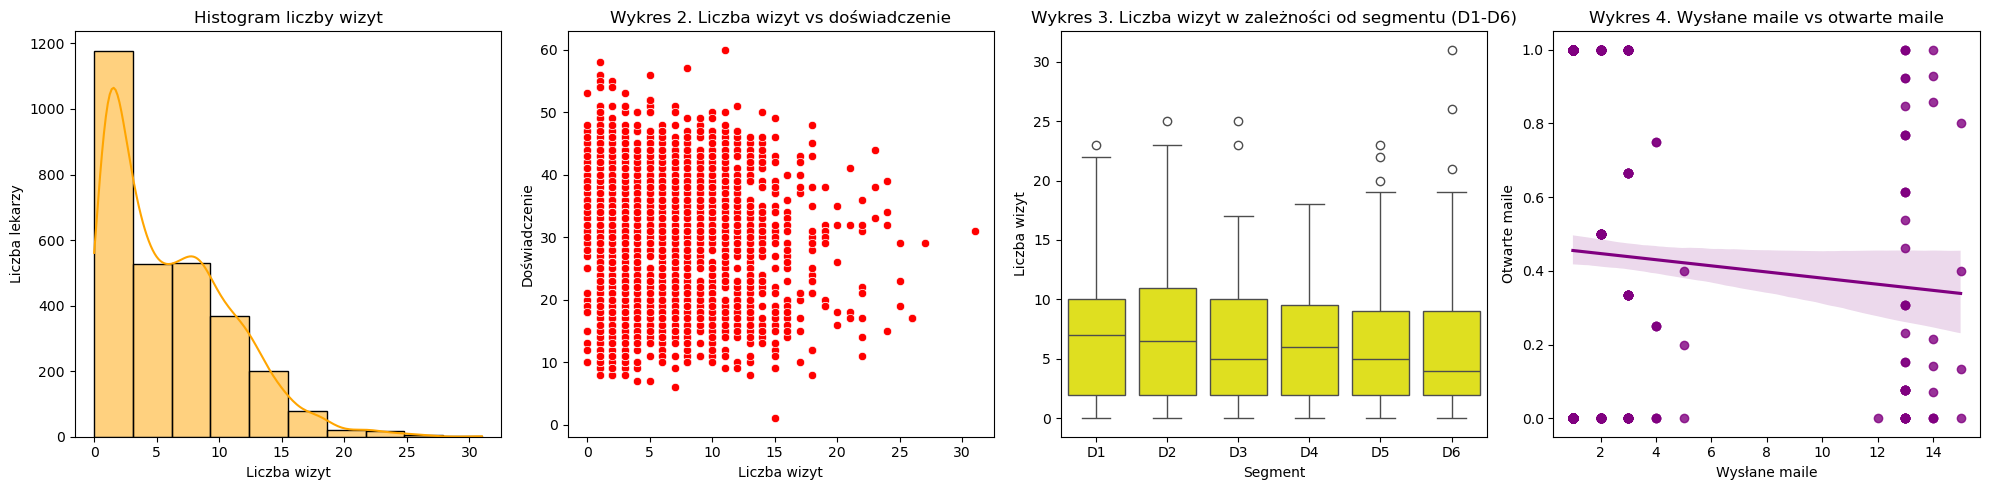

T-test: t-statystyka = -0.9366567323464148, p-wartość = 0.3490650664922573
Nie odrzucamy hipotezy zerowej: brak istotnej różnicy w liczbie wizyt między segmentami A i B.


In [77]:
projekt = pd.DataFrame(projekt)


plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.histplot(projekt['Visits'], bins=10, kde=True, color='orange')
plt.title('Histogram liczby wizyt')
plt.xlabel('Liczba wizyt')
plt.ylabel('Liczba lekarzy')


plt.subplot(1, 4, 2)
sns.scatterplot(x='Visits', y='Experience ', data=projekt, color='red')
plt.title('Wykres 2. Liczba wizyt vs doświadczenie')
plt.xlabel('Liczba wizyt')
plt.ylabel('Doświadczenie')


plt.subplot(1, 4, 3)
filtered_data = projekt[projekt['Segment'].isin(['D1', 'D2', 'D3', 'D4', 'D5', 'D6'])]
order = ['D1','D2','D3','D4','D5','D6']
sns.boxplot(x='Segment', y='Visits', data=filtered_data, order=order, color='yellow')
plt.title('Wykres 3. Liczba wizyt w zależności od segmentu (D1-D6)')
plt.xlabel('Segment')
plt.ylabel('Liczba wizyt')


plt.subplot(1, 4, 4)
sns.regplot(x='Mails sent', y='open rate', data=projekt, color='purple')
plt.title('Wykres 4. Wysłane maile vs otwarte maile')
plt.xlabel('Wysłane maile')
plt.ylabel('Otwarte maile')


plt.tight_layout()
plt.show()


group_a = projekt[projekt['MarketShare'] == 'A']['Visits']
group_b = projekt[projekt['MarketShare'] == 'B']['Visits']

t_statistic, p_value = stats.ttest_ind(group_a, group_b, nan_policy='omit')
print(f'T-test: t-statystyka = {t_statistic}, p-wartość = {p_value}')


alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową: istnieje istotna różnica w liczbie wizyt między segmentami A i B.")
else:
    print("Nie odrzucamy hipotezy zerowej: brak istotnej różnicy w liczbie wizyt między segmentami A i B.")

In [ ]:
Wykres numer 2 pokazuje, że doświadczenie nie jest głównym czynnikiem wpływającym na liczbę wizyt
Wykres numer 3 pokazuje, że rozkład liczby wizyt w segmentach jest podobna
Wykres numer 4 wskazuje, że samo zwiększenie liczby wysłanych maili niekoniecznie poprawia współczynnik otwarć

Macierz korelacji:
               Visits  MkSH number  Mails sent
Visits       1.000000     0.016784    0.122393
MkSH number  0.016784     1.000000   -0.013162
Mails sent   0.122393    -0.013162    1.000000
Korelacja między Visits a MarketShare: 0.01678382686060945
Korelacja między Visits a Segment_numeric: 0.12239324502200105


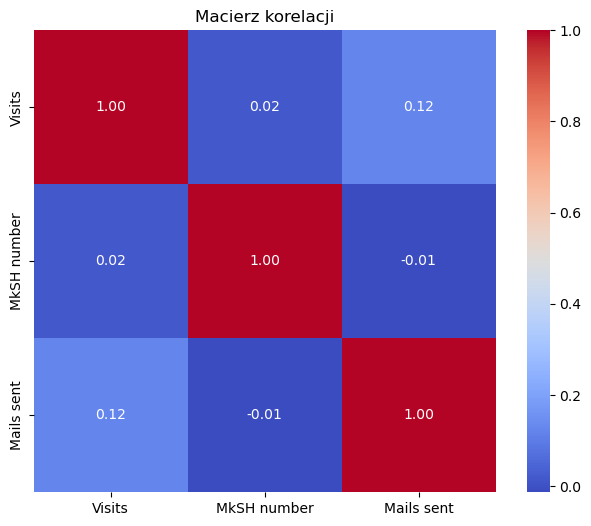

In [43]:
projekt = pd.DataFrame(projekt)


segment_mapping = {f'D{i}': i for i in range(1, 21)}  
projekt['Segment_numeric'] = projekt['Segment'].map(segment_mapping)


correlation_matrix = projekt[['Visits', 'MkSH number', 'Mails sent']].corr()


print("Macierz korelacji:")
print(correlation_matrix)


visits_marketshare_corr = correlation_matrix.loc['Visits', 'MkSH number']
print(f'Korelacja między Visits a MarketShare: {visits_marketshare_corr}')


visits_segment_corr = correlation_matrix.loc['Visits', 'Mails sent']
print(f'Korelacja między Visits a Segment_numeric: {visits_segment_corr}')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)


plt.title('Macierz korelacji')
plt.show()

In [ ]:
Brak istotnych korelacji: Zarówno między liczbą wizyt a numerem MkSH, jak i między numerem MkSH a liczbą wysłanych maili nie widać istotnych korelacji.
To sugeruje, że liczba wizyt nie jest silnie związana z tymi zmiennymi, co może być zaskakujące, jeśli oczekiwałoby się,
że większa liczba wizyt przekłada się na lepsze wyniki w innych obszarach, takich jak wysyłanie maili.